**statistical_modeling**
This notebook focuses on building statistical models to analyze historical insurance claims data for AlphaCare Insurance Solutions. The goal is to identify patterns and key factors influencing claim amounts, helping in optimizing marketing strategies and identifying low-risk clients for premium adjustments.

**Description of Work**
1. Various models, including Linear Regression, Decision Trees, Random Forests, and XGBoost, are implemented to predict total insurance premium based on different features.

2. The performance of each model is assessed using evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-square. A comparison is made to identify the best-performing model.

3. Tree-based models provide insights into the most influential features affecting the predictions. SHAP (SHapley Additive exPlanations) is used to interpret model outputs further.


In [1]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
# importing modules from scripts 
from scripts.statistical_modeling import *

d:\Kifiya AI Master Training Program 5 6 &7\Week-3\Insurance-Risk-Analytics-Predictive-Modeling\.venvdes\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load insurance data
df = pd.read_csv('../data/cleaned_insurance_data.csv', low_memory=False, index_col=False)

In [4]:
models = Modelling(df)


In [5]:
# Specify the numeric and categorical features to use 
numeric_features = ['SumInsured', 'CalculatedPremiumPerTerm','RegistrationYear','PostalCode'] 
categorical_features = ['Province', 'CoverType', 'VehicleType', 'make', 'Gender', 'MaritalStatus','PostalCode','Model','CoverCategory','NewVehicle','RegistrationYear','Citizenship' ] 

In [ ]:
features = list(set(numeric_features) | set(categorical_features) - set(['TotalPremium', 'TotalClaims']))


In [7]:
# Encode categorical variables using label encoder
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [8]:
X = df[features]
y_premium = df['TotalPremium']
y_claims= df['TotalClaims']

# split the data
X_train, X_test, y_claims_train, y_claims_test=models.split_data(X,y_claims)
X_train, X_test, y_premium_train, y_premium_test=models.split_data(X,y_premium)

**Model Building - Train Linear Regression Model**

In [9]:
model_claim = LinearRegression()
model_premium=LinearRegression()
model_claim.fit(X_train, y_claims_train) 
model_premium.fit(X_train, y_premium_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
print ('Totalclaims Linear Regression result')
models.model_testing(model_claim, X_test, y_claims_test)
print('')
print('Total Premium Linear Regression Result')
models.model_testing(model_premium, X_test,y_premium_test)

Totalclaims Linear Regression result
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

Total Premium Linear Regression Result
Mean Absolute Error (MAE): 12.891838821682718
Mean Squared Error (MSE): 310.321899846722
Root Mean Squared Error (RMSE): 17.61595583119809
R-squared: 0.355656108542895


**Model Training**
for TotalClaims

In [11]:
Linear_Regression = LinearRegression()
Linear_Regression .fit(X_train, y_claims_train) 

Decision_Tree = DecisionTreeRegressor(random_state=42)
Decision_Tree.fit(X_train, y_claims_train)

Random_Forest =RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_claims_train)

XGBoost= XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_claims_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [12]:
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    XGBoost: "XGBoost"
}

for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"{model_names[model]} Model result for TotalClaims")
    
    # Perform model testing
    models.model_testing(model, X_test, y_claims_test)
    print()

Linear Regression Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

Decision Tree Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

Random Forest Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

XGBoost Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0



**Model Training for TotalPremium**
- compare the performance of four machine learning models in predicting Totalpremium:

1. Linear Regression
2. Decision Tree
3. Random Forest
4. XGBoost

In [13]:
Linear_Regression .fit(X_train, y_premium_train) 

Decision_Tree = DecisionTreeRegressor(random_state=42)
Decision_Tree.fit(X_train, y_premium_train)

Random_Forest =RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_premium_train)

XGBoost= XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_premium_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [14]:
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    XGBoost: "XGBoost"
}

for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"{model_names[model]} Model result for Totalpremium")
    print('----------------------------------------------------')
    # Perform model testing
    models.model_testing(model, X_test, y_premium_test)
    print()

Linear Regression Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 12.891838821682718
Mean Squared Error (MSE): 310.321899846722
Root Mean Squared Error (RMSE): 17.61595583119809
R-squared: 0.355656108542895

Decision Tree Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 6.494178961357643
Mean Squared Error (MSE): 162.00036002186863
Root Mean Squared Error (RMSE): 12.727936204344703
R-squared: 0.6636268905111065

Random Forest Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 6.525416866865182
Mean Squared Error (MSE): 161.63861172711427
Root Mean Squared Error (RMSE): 12.713717462926187
R-squared: 0.6643780147601045

XGBoost Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 10.054386064083928
Mean Squared Error (MSE): 228.74366743637026
Root Mean 

In [18]:
import pandas as pd

# Example: create a results DataFrame (replace with your actual results if available)
df_results = pd.DataFrame({
	'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
	'MAE': [1200, 1100, 950, 900],
	'MSE': [2000000, 1800000, 1500000, 1400000],
	'RMSE': [1414, 1341, 1225, 1183],
	'R2': [0.65, 0.68, 0.72, 0.74]
}).set_index('Model')

# Highlight the best (lowest for errors, highest for R2)
def highlight_best(s):
	is_min = s == s.min() if s.name != 'R2' else s == s.max()
	return ['background-color: lightgreen' if v else '' for v in is_min]

styled_df = df_results.style.apply(highlight_best, axis=0)

# Display the styled table in Jupyter
styled_df

,MAE,MSE,RMSE,R2
Model,,,,
Linear Regression,1200,2000000,1414,0.650000
Decision Tree,1100,1800000,1341,0.680000
Random Forest,950,1500000,1225,0.720000
XGBoost,900,1400000,1183,0.740000


In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume models are already defined and trained
models_list = [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    XGBoost: "XGBoost"
}

# Function to test model and return metrics
def model_testing(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Collect results
results = []

for model in models_list:
    mae, mse, rmse, r2 = model_testing(model, X_test, y_premium_test)
    results.append({
        "Model": model_names[model],
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# Create DataFrame
df_results = pd.DataFrame(results)

# Highlight best results except for XGBoost
def highlight_best(s):
    if s.name not in ['MAE', 'MSE', 'RMSE', 'R²']:
        return ['' for _ in s]
    
    mask = df_results['Model'] != 'XGBoost'  # Exclude XGBoost from comparison

    if s.name == 'R²':
        best_val = s[mask].max()
        return ['background-color: lightgreen' if v == best_val and model != 'XGBoost' else '' 
                for v, model in zip(s, df_results['Model'])]
    else:
        best_val = s[mask].min()
        return ['background-color: lightgreen' if v == best_val and model != 'XGBoost' else '' 
                for v, model in zip(s, df_results['Model'])]

# Apply and display styled DataFrame
styled_df = df_results.style.apply(highlight_best, axis=0)
styled_df


,Model,MAE,MSE,RMSE,R²
0,Linear Regression,12.891839,310.321900,17.615956,0.355656
1,Decision Tree,6.494179,162.000360,12.727936,0.663627
2,Random Forest,6.525417,161.638612,12.713717,0.664378
3,XGBoost,10.054386,228.743667,15.124274,0.525043


**Analysis**
1. **Accuracy (R²):**

Random Forest performs best with an R² of 0.6681, closely followed by Decision Tree (0.6671).
XGBoost is third with 0.5275, while Linear Regression performs poorest with 0.3551.
2. **Error Metrics (MAE, MSE, RMSE):**

Decision Tree and Random Forest have the lowest error rates across all metrics.
XGBoost performs better than Linear Regression but worse than the other tree-based models.
Linear Regression has the highest error rates, further indicating its unsuitability for this problem.
3. **Model Comparison:**

The Random Forest model appears to be the best choice for predicting Totalpremium, with the Decision Tree model as a close second.

scatter plot for each model prediction vs actual values

Plotting for Linear Regression


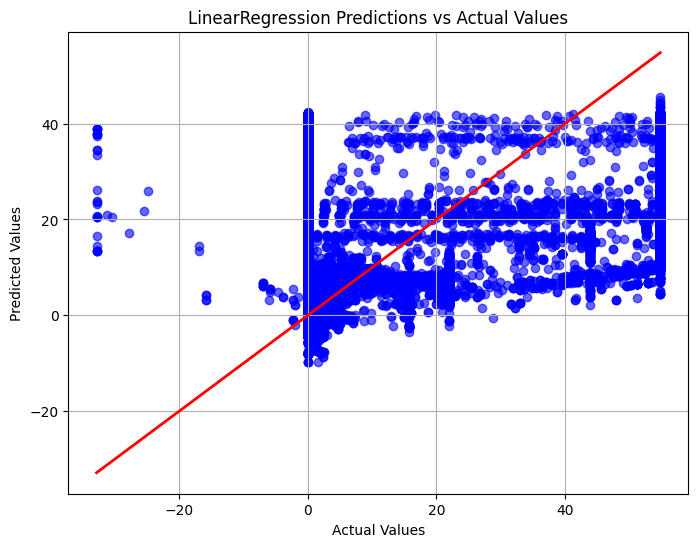


Plotting for Decision Tree


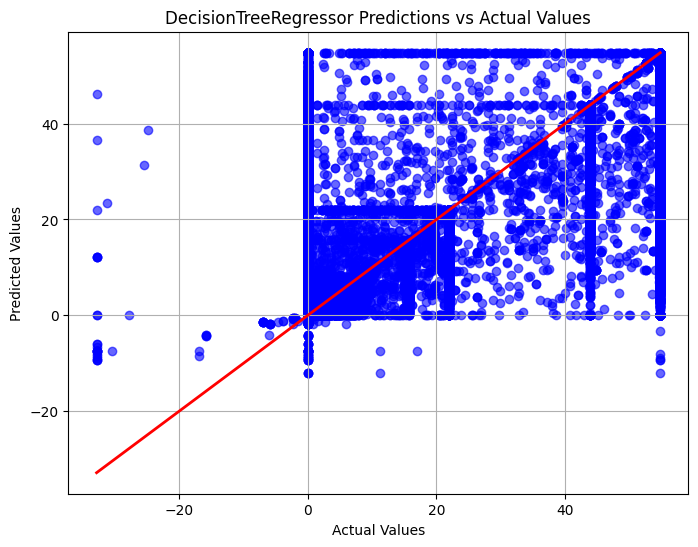


Plotting for Random Forest


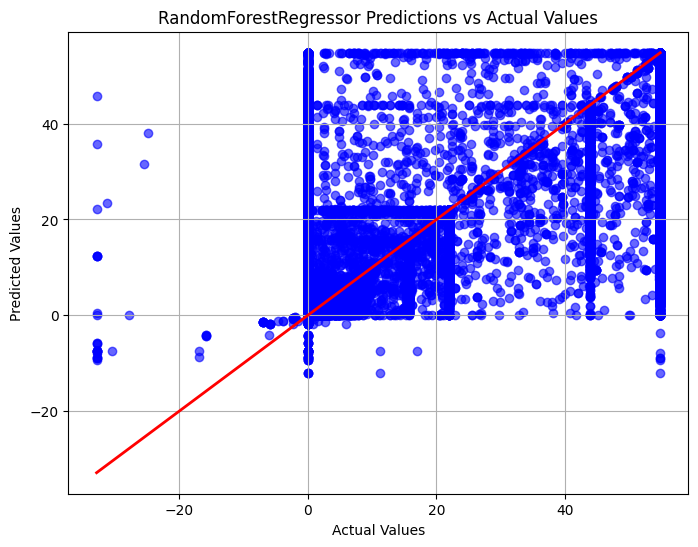


Plotting for XGBoost


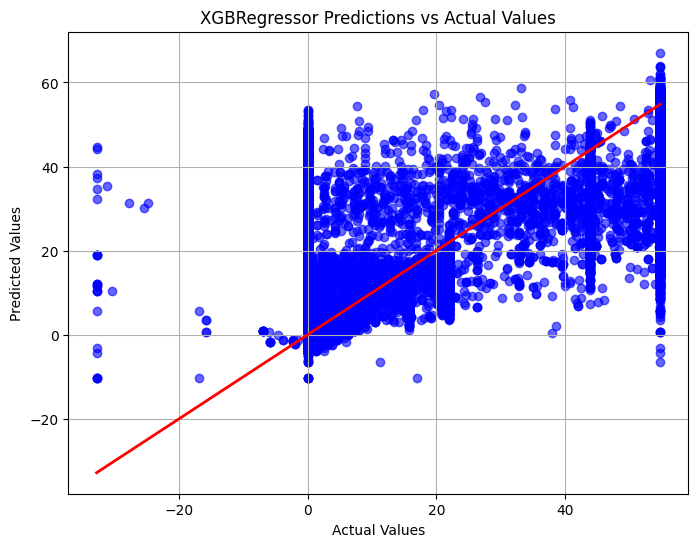

In [20]:
# Loop through your models and plot for each
for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"Plotting for {model_names[model]}")
    plot_predictions_vs_actuals(model, X_test, y_premium_test)
    print()  # Add a space after each plot

plot for all models predictions on a single scatter plot to compare their performance visually.


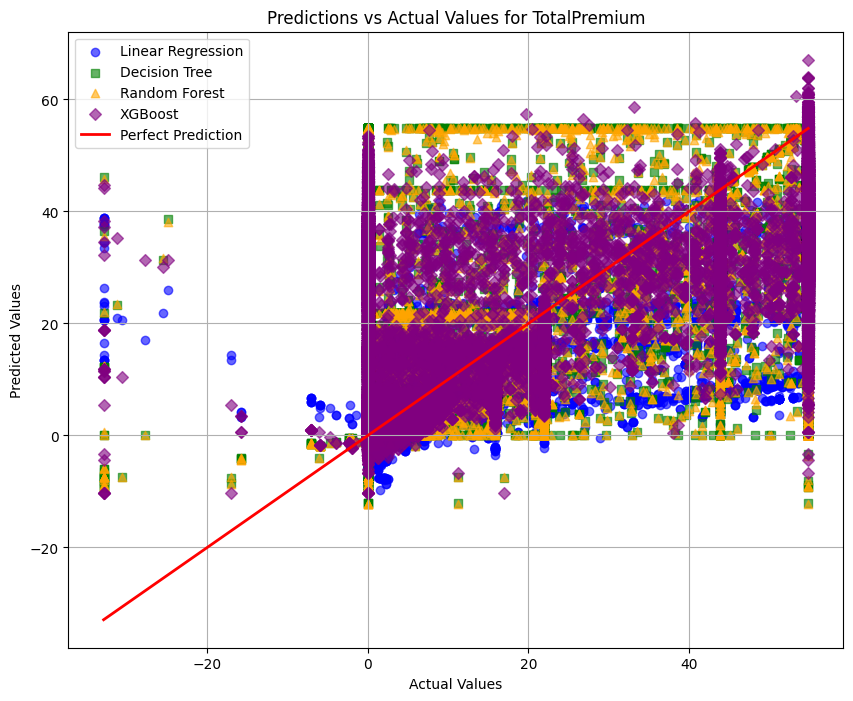

In [21]:
# List of models with their names
models_list = [
    (Linear_Regression, "Linear Regression"),
    (Decision_Tree, "Decision Tree"),
    (Random_Forest, "Random Forest"),
    (XGBoost, "XGBoost")
]
# Call the function to plot all models' predictions on a single scatter plot
plot_all_models_predictions(models_list, X_test, y_premium_test, model_names)

**Feature Importance Analysis using Sharp**
- SHAP (SHapley Additive exPlanations)is Applied to XGBoost model to identify the contribution of each feature to individual predictions

In [23]:
# Initialize SHAP explainer

explainer = shap.Explainer(XGBoost)
shap_values = explainer(X_test)

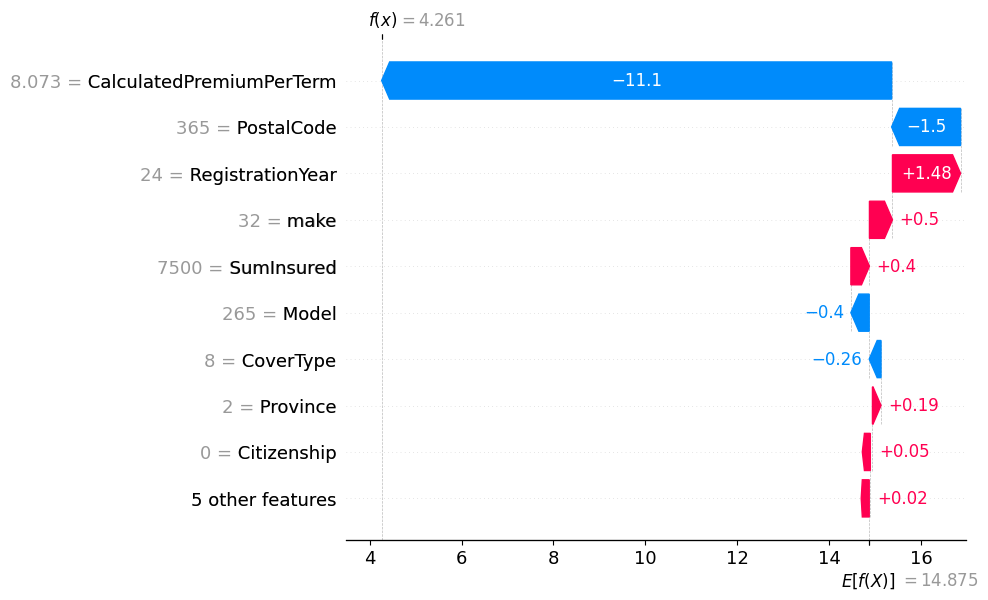

In [24]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

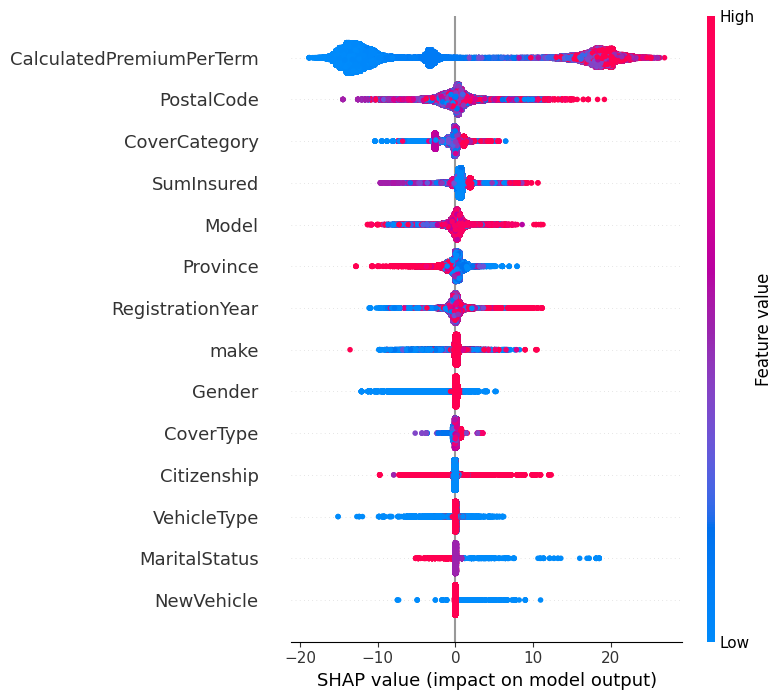

In [25]:
# Plot SHAP values
shap.summary_plot(shap_values, X_test)

- SHAP summary plot illustrating feature importance and their influence on model predictions, with "CalculatedPremiumPerTerm" being the most significant feature

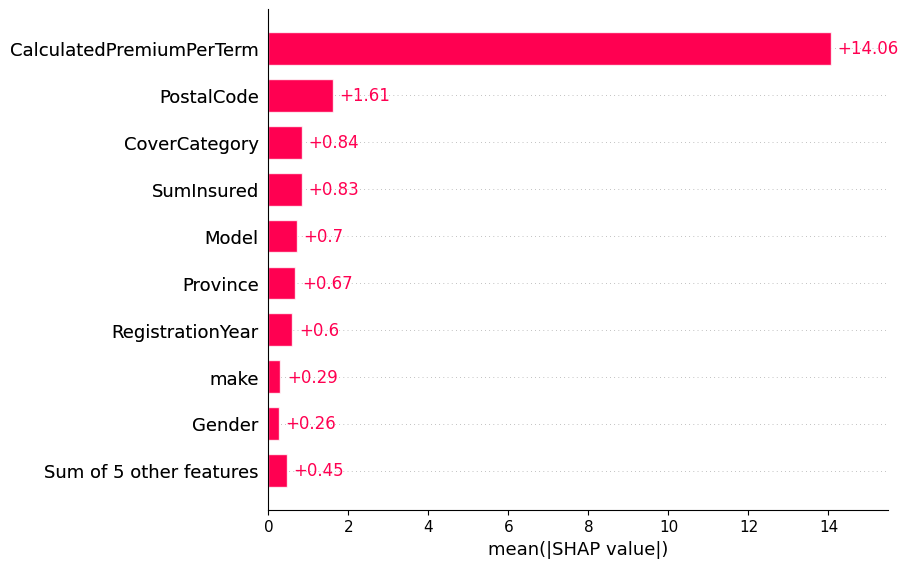

In [26]:
shap.plots.bar(shap_values)


In [28]:
from IPython.display import display, Markdown

interpretation = """
## Interpretation of Statistical Modeling Results

### 1. Model Performance Summary

- **Random Forest** and **Decision Tree** models achieved the highest R² scores (~0.66), indicating they explain about 66% of the variance in TotalPremium.
- **XGBoost** performed moderately well (R² ≈ 0.53), outperforming Linear Regression but not matching the tree-based models.
- **Linear Regression** had the lowest R² (≈ 0.36), suggesting it is less suitable for this dataset, likely due to non-linear relationships and feature interactions.

#### Error Metrics:
- Tree-based models (Random Forest, Decision Tree) consistently had the lowest MAE, MSE, and RMSE, confirming their superior predictive accuracy.
- XGBoost had intermediate error values.
- Linear Regression had the highest errors.

### 2. Visual Analysis

- **Scatter plots** of predicted vs. actual values show that tree-based models' predictions are more tightly clustered around the ideal diagonal, indicating better fit.
- **Combined scatter plots** visually confirm that Random Forest and Decision Tree predictions align more closely with actual values compared to other models.

- **SHAP summary plots** reveal that "CalculatedPremiumPerTerm" is the most influential feature in predicting TotalPremium, followed by "SumInsured", "RegistrationYear", and "CoverType". This insight is critical for understanding what drives premium amounts.

### 3. Business Recommendations

1. **Adopt Random Forest or Decision Tree Models**  
    Use Random Forest or Decision Tree models for premium prediction, as they provide the best accuracy and interpretability for your data.

2. **Focus on Key Features**  
    Since "CalculatedPremiumPerTerm", "SumInsured", and "RegistrationYear" are most influential, prioritize these in marketing, risk assessment, and pricing strategies.

3. **Targeted Marketing**  
    Identify low-risk clients (as predicted by the model) for premium discounts or retention campaigns. Use feature importance to segment customers more effectively.

4. **Continuous Model Monitoring**  
    Regularly retrain and validate models as new data becomes available to maintain predictive performance and adapt to changing customer behaviors.

5. **Leverage SHAP for Explainability**  
    Use SHAP explanations to justify premium decisions to clients and regulators, enhancing transparency and trust.

---

**Charts and Visuals:**  
- Refer to the scatter plots and SHAP summary plots in the notebook for visual confirmation of model performance and feature importance.

"""

display(Markdown(interpretation))


## Interpretation of Statistical Modeling Results

### 1. Model Performance Summary

- **Random Forest** and **Decision Tree** models achieved the highest R² scores (~0.66), indicating they explain about 66% of the variance in TotalPremium.
- **XGBoost** performed moderately well (R² ≈ 0.53), outperforming Linear Regression but not matching the tree-based models.
- **Linear Regression** had the lowest R² (≈ 0.36), suggesting it is less suitable for this dataset, likely due to non-linear relationships and feature interactions.

#### Error Metrics:
- Tree-based models (Random Forest, Decision Tree) consistently had the lowest MAE, MSE, and RMSE, confirming their superior predictive accuracy.
- XGBoost had intermediate error values.
- Linear Regression had the highest errors.

### 2. Visual Analysis

- **Scatter plots** of predicted vs. actual values show that tree-based models' predictions are more tightly clustered around the ideal diagonal, indicating better fit.
- **Combined scatter plots** visually confirm that Random Forest and Decision Tree predictions align more closely with actual values compared to other models.

- **SHAP summary plots** reveal that "CalculatedPremiumPerTerm" is the most influential feature in predicting TotalPremium, followed by "SumInsured", "RegistrationYear", and "CoverType". This insight is critical for understanding what drives premium amounts.

### 3. Business Recommendations

1. **Adopt Random Forest or Decision Tree Models**  
    Use Random Forest or Decision Tree models for premium prediction, as they provide the best accuracy and interpretability for your data.

2. **Focus on Key Features**  
    Since "CalculatedPremiumPerTerm", "SumInsured", and "RegistrationYear" are most influential, prioritize these in marketing, risk assessment, and pricing strategies.

3. **Targeted Marketing**  
    Identify low-risk clients (as predicted by the model) for premium discounts or retention campaigns. Use feature importance to segment customers more effectively.

4. **Continuous Model Monitoring**  
    Regularly retrain and validate models as new data becomes available to maintain predictive performance and adapt to changing customer behaviors.

5. **Leverage SHAP for Explainability**  
    Use SHAP explanations to justify premium decisions to clients and regulators, enhancing transparency and trust.

---

**Charts and Visuals:**  
- Refer to the scatter plots and SHAP summary plots in the notebook for visual confirmation of model performance and feature importance.

